# Trabalho Prático nº 1 - Análise de Expressões Faciais em Vídeo
## Tópicos de Ciência dos Dados - MECD (2023/2024)

- Carlos Matos - 2020245868
- Mariana Magueijo - 2020246886

### Parte B

#### 1. Data Spliting e Métricas de Exatidão em Machine Learning

##### 1.1 Data spliting

1.1.1 Train-Test e Train-Validation-Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from ReliefF import ReliefF
from skfeature.function.similarity_based import fisher_score
import os
import pickle as pkl
from sklearn.neural_network import MLPClassifier
import random
from sklearn.preprocessing import LabelEncoder

In [3]:
def train_test(data, target, train_size):
    x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=train_size)
    tt = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]}
    return tt

In [4]:
def train_validation_test(data, target, train_size, test_size):
    x_train, x_rem, y_train, y_rem = train_test_split(data, target, train_size=train_size)
    test_size = test_size/(1 - train_size)
    x_validation, x_test, y_validation, y_test = train_test_split(x_rem, y_rem, train_size=test_size)
    t_validation = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test], "VALIDATION": [x_validation, y_validation]}
    
    return t_validation

##### 1.1.2 K-Fold

In [5]:
def k_fold(x, y, n_split):
    k = KFold(n_splits=n_split, shuffle=True)
    kfold = []
    for i, j in k.split(x):
        x_train, x_test = x[i], x[j]
        y_train, y_test = y[i], y[j]
        kfold.append({"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]})
    
    return kfold

##### 1.2 Métricas de exatidão

1.2.1 Matriz de confusão

In [6]:
def metrics(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    r = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    ps = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    fs = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    if labels is not None:
        try:
            display(pd.DataFrame([r, ps, fs], columns=['Metrics']).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1-score'}))
            cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
            _, ax = plt.subplots(figsize=(5,5))
            cmp.plot(ax=ax)
            ax.set_title("Confusion Matrix")
            ax.set_xlabel("Predicted")
            ax.set_xticklabels(labels, rotation="vertical")
            ax.set_ylabel("True")
            plt.show()
        except pd.errors.DtypeWarning as pd_error:
            print(f"Pandas Error: {pd_error}")
        except Exception as e:
            display(pd.DataFrame([cm, r, ps, fs], columns=['Metrics']).rename(index={0: 'Confusion Matrix', 1: 'Recall', 2: 'Precision', 3: 'F1-score'}))
    return cm, r, ps, fs

#### 2. K-Nearest Neighbours

##### 2.1 Data set Iris

In [7]:
def dataset_iris():
    iris = datasets.load_iris()
    data = iris["data"]
    target = iris["target"]
    labels = iris["target_names"]
    feature = iris["feature_names"]
    return data, target, labels, feature, iris

In [8]:
array_k = np.array([1, 3, 5, 7, 9, 11, 13, 15])
d, t, l, feat, iris= dataset_iris()

In [9]:
def k_nearest_neighbours(x, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, y)
    return neigh

2.1.1  Train-only

In [10]:
def to_2_1_1(x, y, labels, k):
    neigh = k_nearest_neighbours(x, y, k)
    y_pred = neigh.predict(x)
    y_true = y
    metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


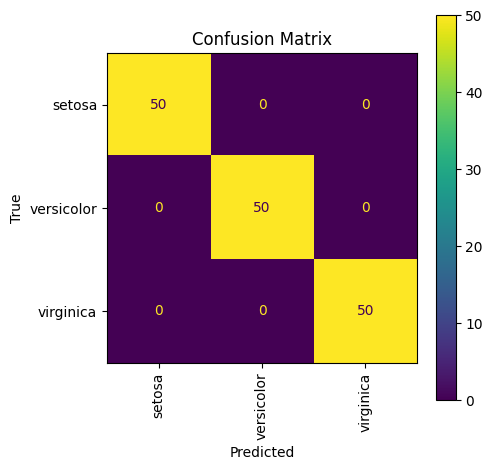

In [11]:
print("------------------ Train-Only ------------------")
to_2_1_1(d, t, l, 1)

2.1.1 TT 70-30

In [12]:
def tt_2_1_1(x, y, labels, k):
    tt = train_test(x, y, 0.7)
    neigh = k_nearest_neighbours(tt["TRAIN"][0], tt["TRAIN"][1], k)
    y_pred = neigh.predict(tt["TEST"][0])
    y_true = tt["TEST"][1]
    metrics(y_true, y_pred, labels)

------------------ Train-Test ------------------


,Metrics
Recall,0.955556
Precision,0.955556
F1-score,0.955556


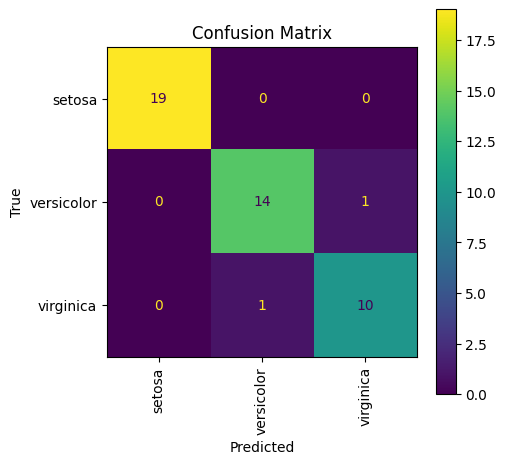

In [13]:
print("------------------ Train-Test ------------------")
tt_2_1_1(d, t, l, 1)

2.1.1  10x10-fold cross-validation (10CV)

In [14]:
def cv_2_1_1(x, y, n_splits, labels, k):
    kfold = k_fold(x, y, n_splits)
    count = 0
    for i in kfold:
        print("-> Iteração " + str(count) + "\n")
        neigh = k_nearest_neighbours(i["TRAIN"][0], i["TRAIN"][1], k)
        y_pred = neigh.predict(i["TEST"][0])
        y_true = i["TEST"][1]
        metrics(y_pred, y_true, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


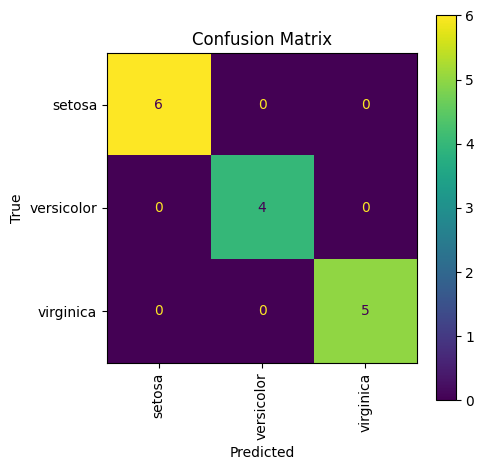

-> Iteração 1



,Metrics
Recall,0.933333
Precision,0.940741
F1-score,0.931590


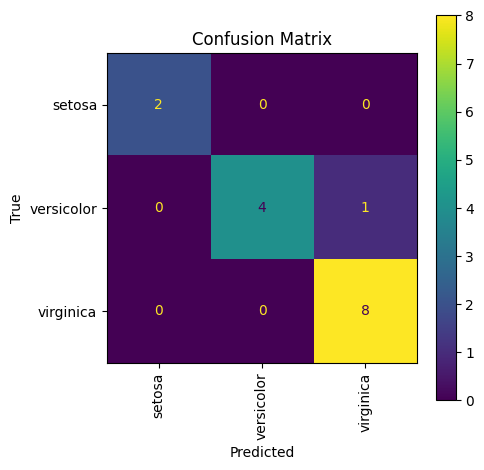

-> Iteração 2



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


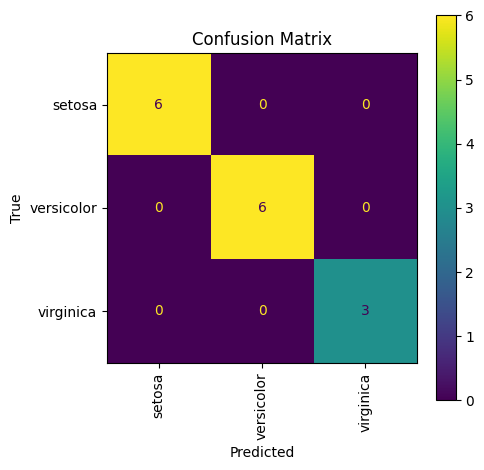

-> Iteração 3



,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.934141


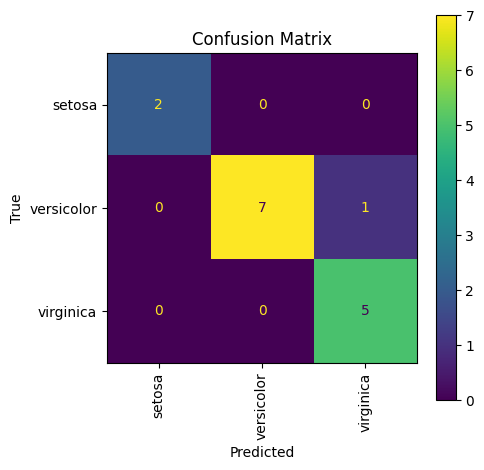

-> Iteração 4



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


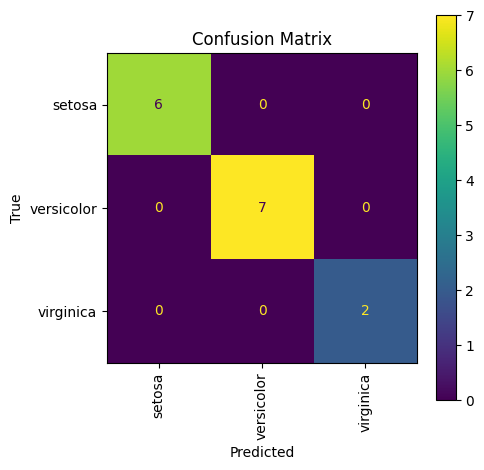

-> Iteração 5



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


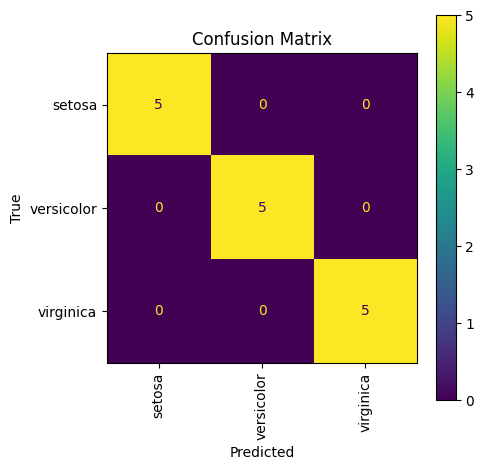

-> Iteração 6



,Metrics
Recall,0.933333
Precision,0.955556
F1-score,0.935238


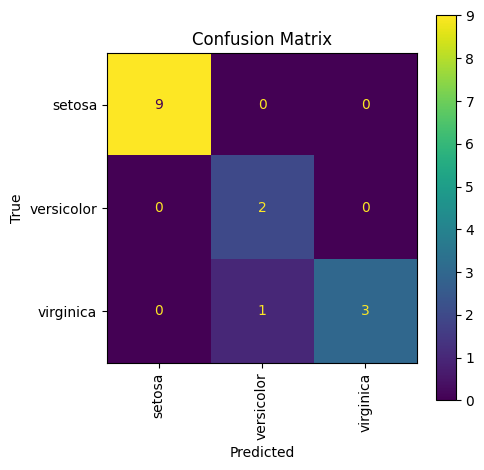

-> Iteração 7



,Metrics
Recall,0.866667
Precision,0.904762
F1-score,0.866667


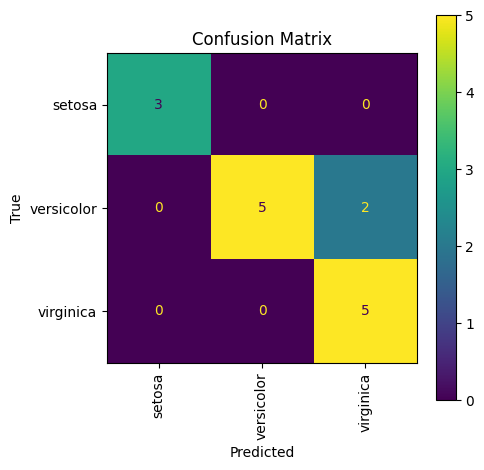

-> Iteração 8



,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.934473


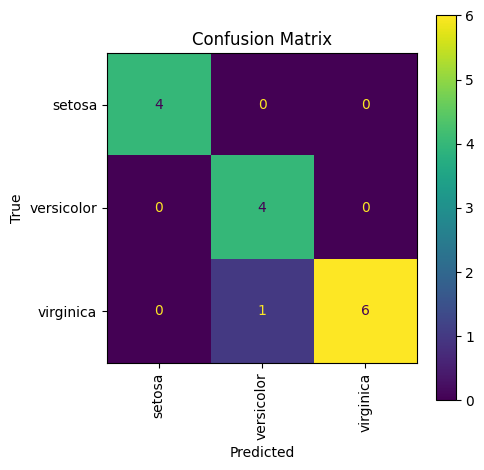

-> Iteração 9



,Metrics
Recall,0.933333
Precision,0.950000
F1-score,0.934392


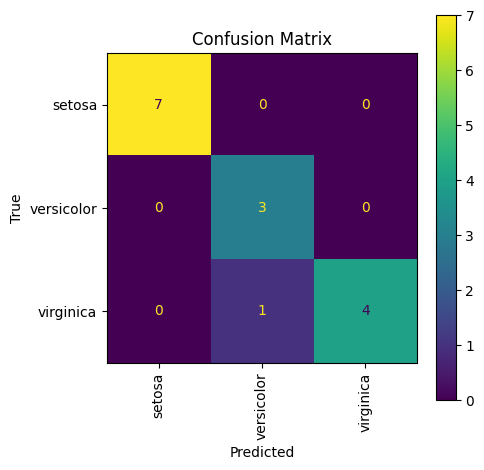

In [15]:
print("------------------ Cross-Validation ------------------")
cv_2_1_1(d, t, 10, l, 1)

2.1.2 Funções auxiliares

In [16]:
def plot_metrics(d_metrics):
    plt.plot(d_metrics["Recall"], label="Recall")
    plt.plot(d_metrics["Precision"], label="Precision")
    plt.plot(d_metrics["F1-score"], label="F1-score")
    plt.title("Metrics Comparison")
    plt.xlabel("K values")
    plt.ylabel("Metrics")
    plt.legend()
    plt.show()

In [17]:
def return_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        neigh = k_nearest_neighbours(x, y, k)
        y_pred = neigh.predict(x)
        y_true = y
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

2.1.2 Train-Only

In [18]:
def to_2_1_2(x, y, labels, plot):
    d_metrics = return_d_metrics(x, y)
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]

    neigh = k_nearest_neighbours(x, y, best_k)
    y_pred = neigh.predict(x)
    y_true = y
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


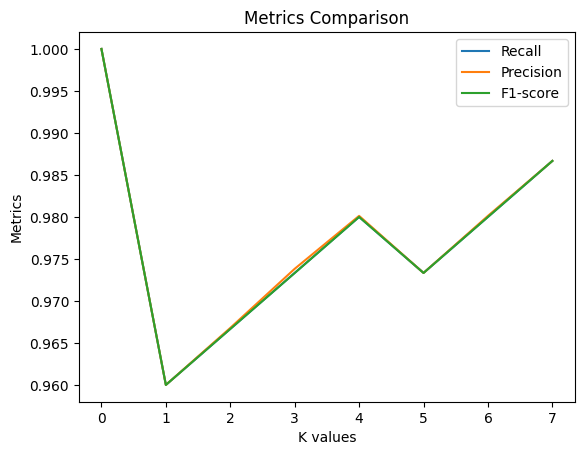

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


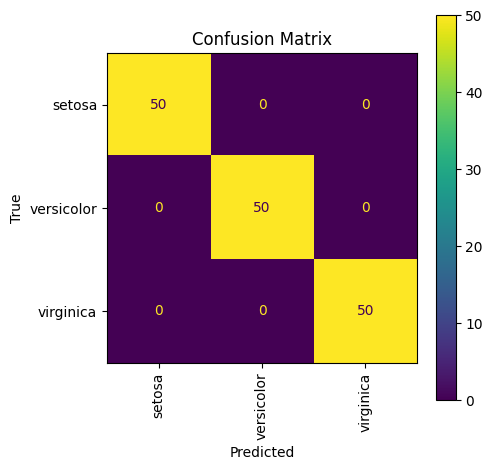

In [19]:
print("------------------ Train-Only ------------------")
to_2_1_2(d, t, l, True)

2.1.2 TVT 40-30-30

In [20]:
def tvt_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        tv = train_validation_test(x, y, 0.4, 0.3)
        neigh = k_nearest_neighbours(tv["TRAIN"][0], tv["TRAIN"][1], k)
        y_pred = neigh.predict(tv["VALIDATION"][0])
        y_true = tv["VALIDATION"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

In [21]:
def tvt_2_1_2(x, y, labels, plot):
    d_metrics = tvt_d_metrics(x, y)
    
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
    tv = train_validation_test(x, y, 0.4, 0.3)
    new_t0 = np.concatenate((tv["TRAIN"][0], tv["VALIDATION"][0]), axis=0)
    new_t1 = np.concatenate((tv["TRAIN"][1], tv["VALIDATION"][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    y_pred = neigh.predict(tv["TEST"][0])
    y_true = tv["TEST"][1]
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Validation-Test ------------------


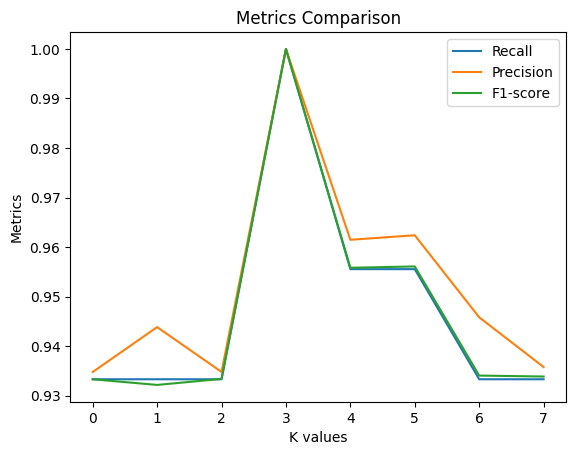

Best k: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


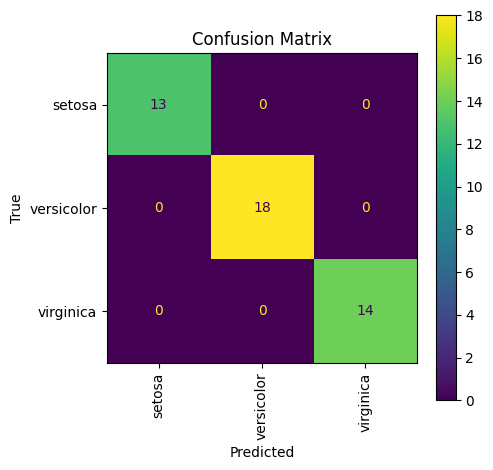

In [22]:
print("------------------ Train-Validation-Test ------------------")
tvt_2_1_2(d, t, l, True)

2.1.2  10x10CV

In [23]:
def cv_d_metrics(kfold):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}

    for k in array_k:
        neigh = k_nearest_neighbours(kfold["TRAIN"][0], kfold["TRAIN"][1], k)
        y_pred = neigh.predict(kfold["TEST"][0])
        y_true = kfold["TEST"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)

    return d_metrics

In [24]:
def cv_2_1_2(x, y, labels, plot):
    kfold = k_fold(x, y, 10)
    count = 0
    for k in kfold:
        print("-> Iteração " + str(count) + "\n")
        d_metrics = cv_d_metrics(k)
        best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
        neigh = k_nearest_neighbours(k["TRAIN"][0], k["TRAIN"][1], best_k)
        y_pred = neigh.predict(k["TEST"][0])
        y_true = k["TEST"][1]
        
        if plot:
            plot_metrics(d_metrics)
            print("Best k: " + str(best_k))
            metrics(y_true, y_pred, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



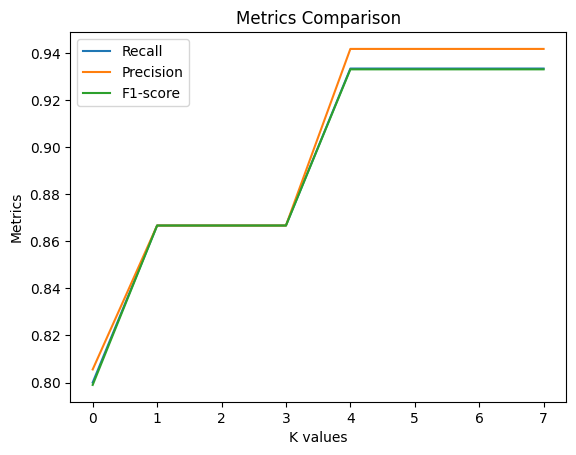

Best k: 9


,Metrics
Recall,0.933333
Precision,0.941667
F1-score,0.932991


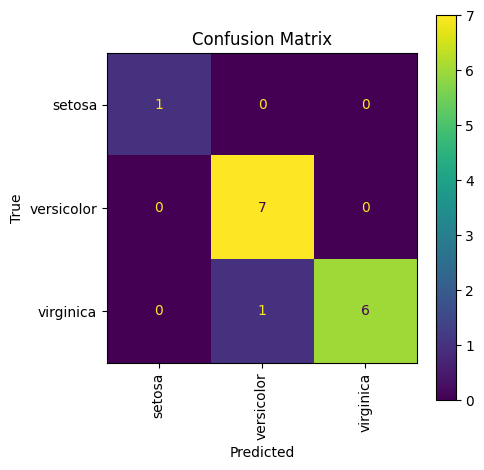

-> Iteração 1



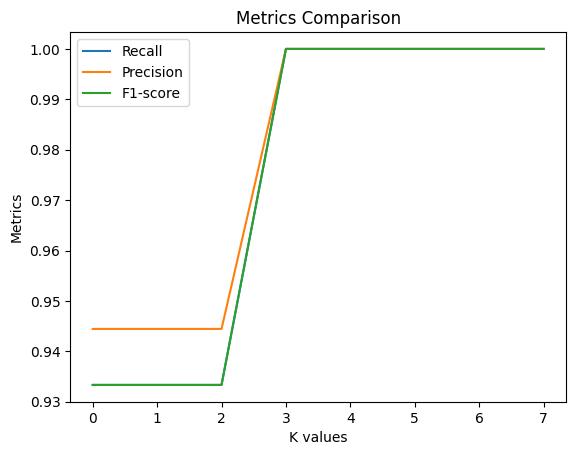

Best k: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


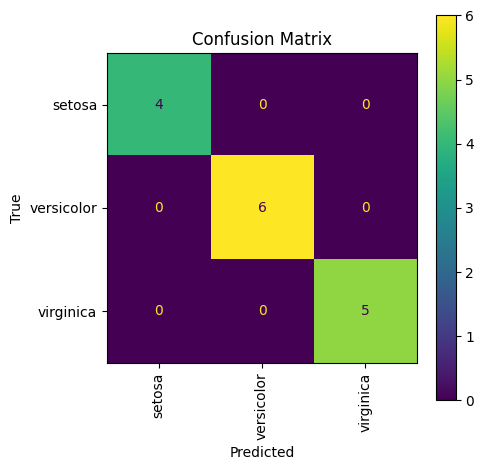

-> Iteração 2



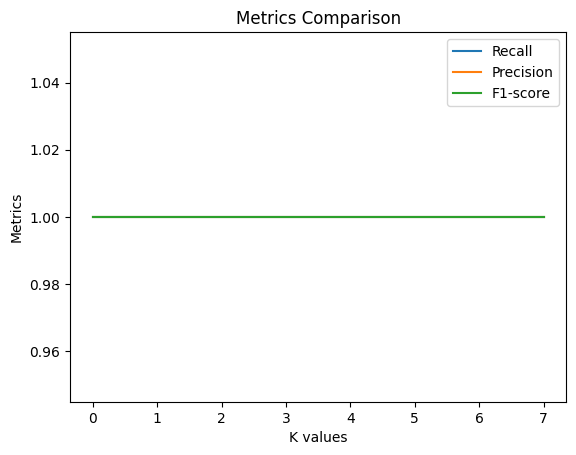

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


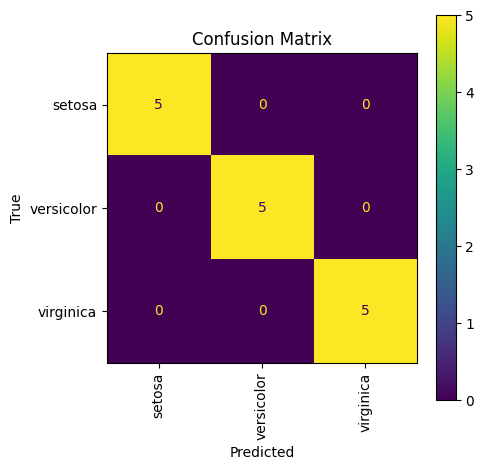

-> Iteração 3



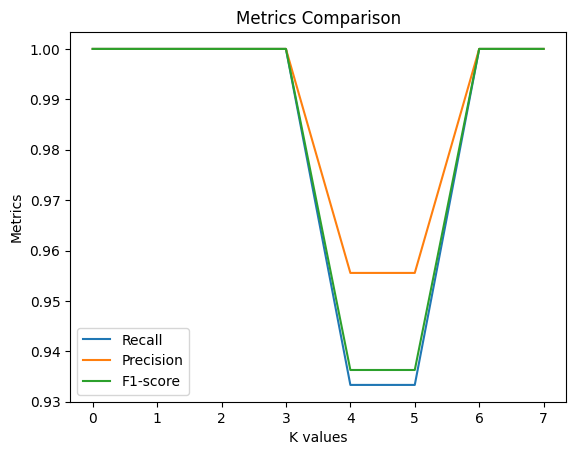

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


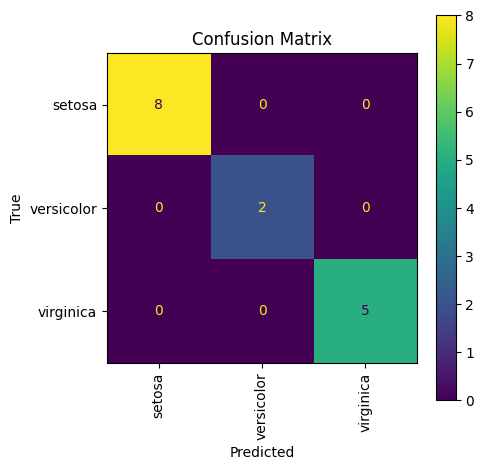

-> Iteração 4



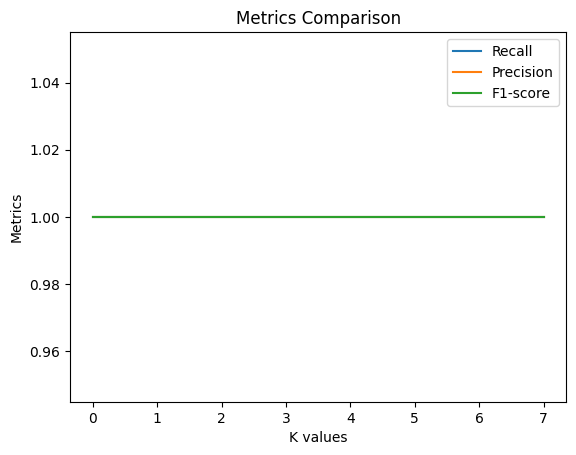

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


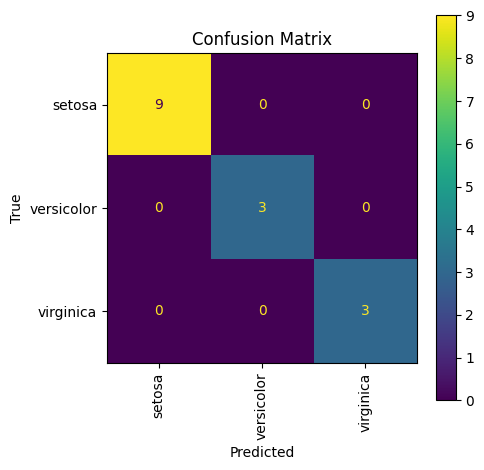

-> Iteração 5



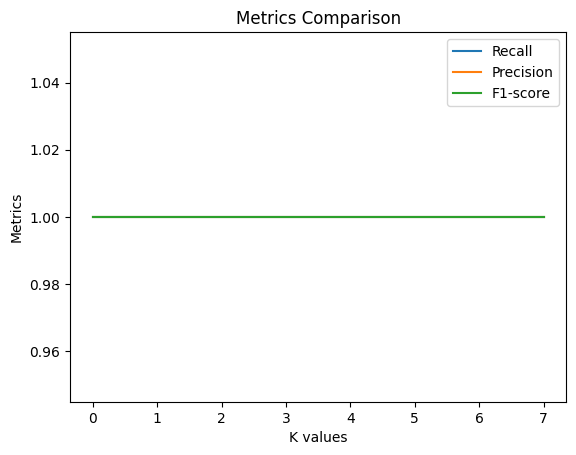

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


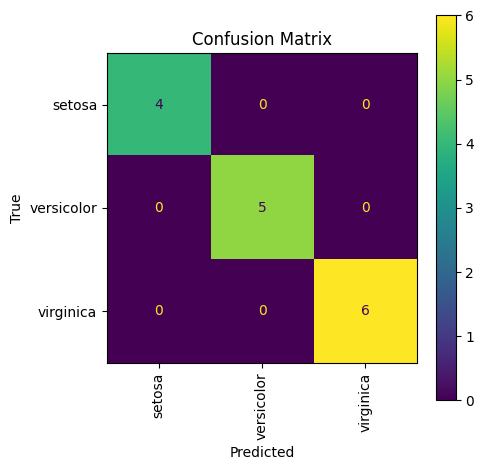

-> Iteração 6



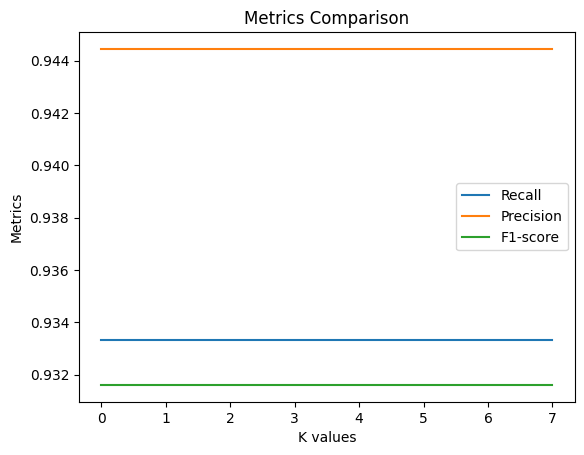

Best k: 1


,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.931602


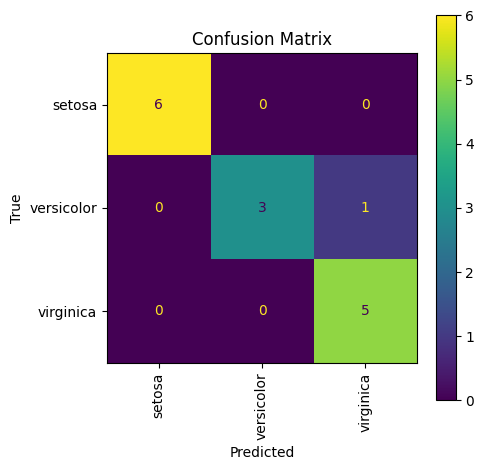

-> Iteração 7



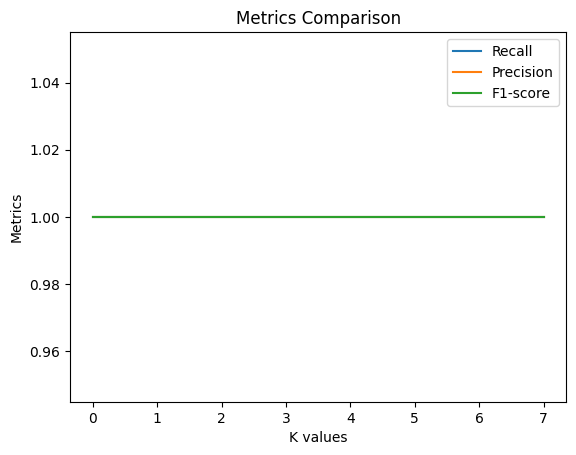

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


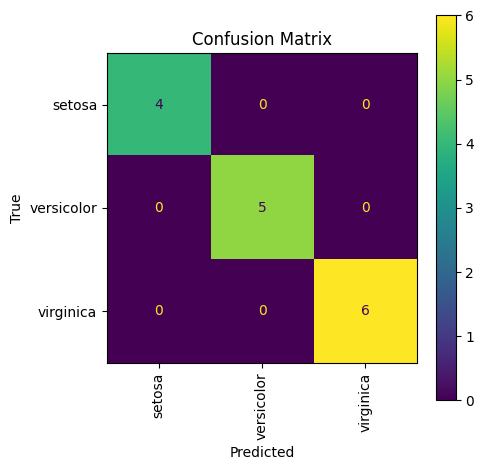

-> Iteração 8



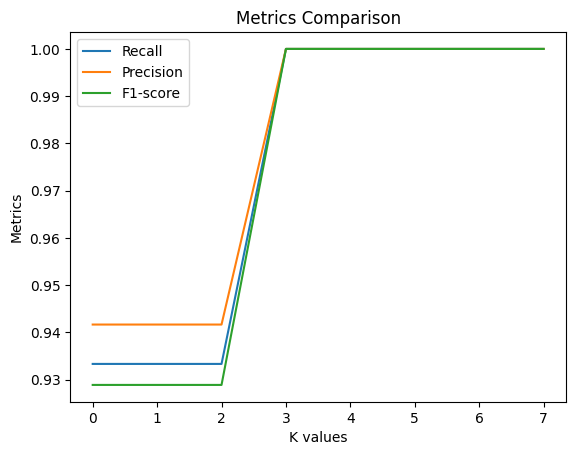

Best k: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


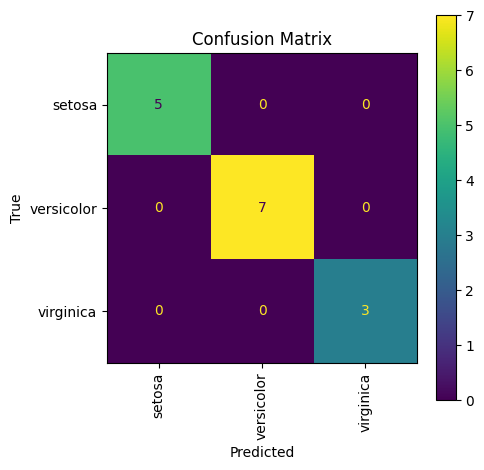

-> Iteração 9



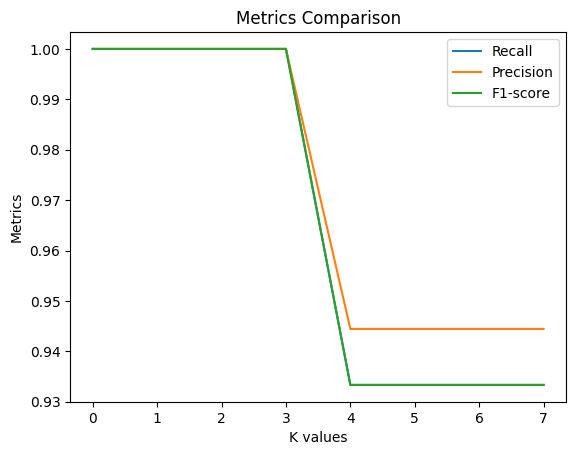

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


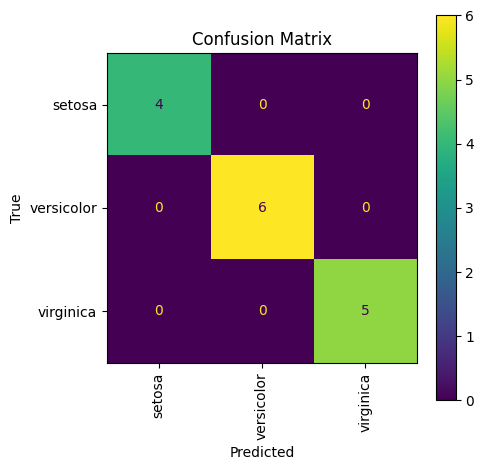

In [25]:
print("------------------ Cross-Validation ------------------")
cv_2_1_2(d, t, l, True)

#### 2.2 Ranking de Features e Modelo Ideal

In [26]:
def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

2.2.1 Métrica F1-score com critério

In [27]:
def parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot):
    best_k = array_k[f1_aux.index(max(f1_aux))]
    string_features["Number of Features"].append(str(len(f)))
    string_features["Best k"].append(str(best_k))

    new_t0 = np.concatenate((x_train, x_validation), axis=0)
    new_t1 = np.concatenate((tv['TRAIN'][1], tv['VALIDATION'][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    x_test = tv['TEST'][0][:, f]
    y_pred = neigh.predict(x_test)
    y_true = tv['TEST'][1]
    cm, r, ps, fs = metrics(y_true, y_pred, None)
    string_features["F1-score"].append(str(fs))
    if plot:
        for p in string_features:
            print(p + ": " + string_features[p][i])
    return fs, string_features

In [28]:
def plot_features(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    plt.plot(f1)
    plt.axis("off")
    plt.show()

In [29]:
def plot_f1_score(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    for i in range(len(f1)):
        label = "Feature: " + str(i + 1)
        plt.plot(f1[i], label=label)
    plt.title("F1-score Comparision per Feature")
    plt.xlabel("k values")
    plt.ylabel("F1-score")
    plt.legend()
    plt.show()

In [30]:
def ranking_features(x, y, feat, n_repetitions, plot):
    tv = train_validation_test(x, y, 0.4, 0.3)
    f1 = []
    array_elbow = []
    string_features = {"Number of Features": [], "Best k": [], "F1-score": []}

    for i in range(n_repetitions):
        f1_aux = []
        f = feat[: (i + 1)]
        x_train = tv["TRAIN"][0][:, f]
        x_validation = tv["VALIDATION"][0][:, f]
        for k in array_k:
            neigh = k_nearest_neighbours(x_train, tv["TRAIN"][1], k)
            
            y_pred = neigh.predict(x_validation)
            y_true = tv["VALIDATION"][1]
            cm, r, ps, fs = metrics(y_true, y_pred, None)
            f1_aux.append(fs)
        f1.append(f1_aux)
        if plot: 
            plot_features(f1_aux, 3, 1)
        fs, string_features = parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot)
        array_elbow.append(fs)
    
    return array_elbow, f1, string_features

------------------ Features Ranking ------------------


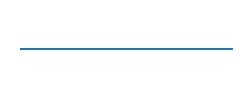

Number of Features: 1
Best k: 1
F1-score: 0.9777530589543938


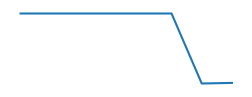

Number of Features: 2
Best k: 1
F1-score: 1.0


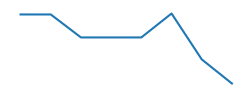

Number of Features: 3
Best k: 11
F1-score: 1.0


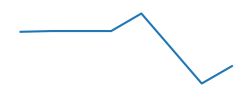

Number of Features: 4
Best k: 9
F1-score: 1.0


In [31]:
print("------------------ Features Ranking ------------------")
feat = reliefF(d, t)
number_repetitions = 4
f1_score_elbow_1, f1_score_1, str_print_1 = ranking_features(d, t, feat, number_repetitions, True)

2.2.2 Gráfico do Cotovelo

In [32]:
def plot_elbow(array_elbow):
    index = np.arange(1, len(array_elbow) + 1)
    plt.figure(figsize=(5,5))
    plt.plot(index, array_elbow)
    plt.title("Elbow Graph")
    plt.xlabel("Number of Features")
    plt.ylabel("F1-score")
    plt.show()

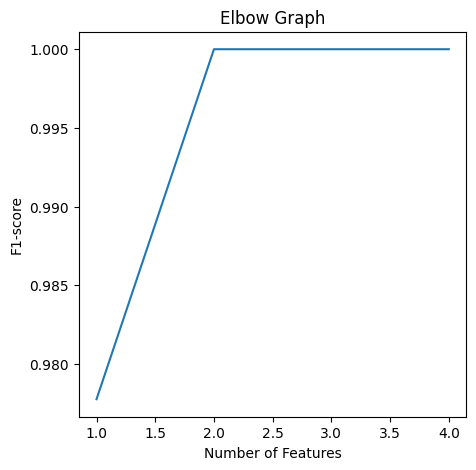

In [33]:
plot_elbow(f1_score_elbow_1)

2.2.3 Resultados Alcançados

In [34]:
def results(f1, feature):
    label = ['Nº of features: ' + str(i + 1) for i in range(len(feature))]
    col = ['k=' + str(i) for i in array_k]
    df = pd.DataFrame(f1, columns=col, index=label)
    display(df)
    plot_f1_score(f1, 8, 8)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
Nº of features: 2,0.954641,0.954641,0.954641,0.954641,0.954641,0.954641,0.933707,0.933885
Nº of features: 3,0.954641,0.954641,0.932756,0.932756,0.932756,0.955556,0.911852,0.888889
Nº of features: 4,0.954641,0.955556,0.955556,0.955556,0.977585,0.933707,0.889808,0.911600


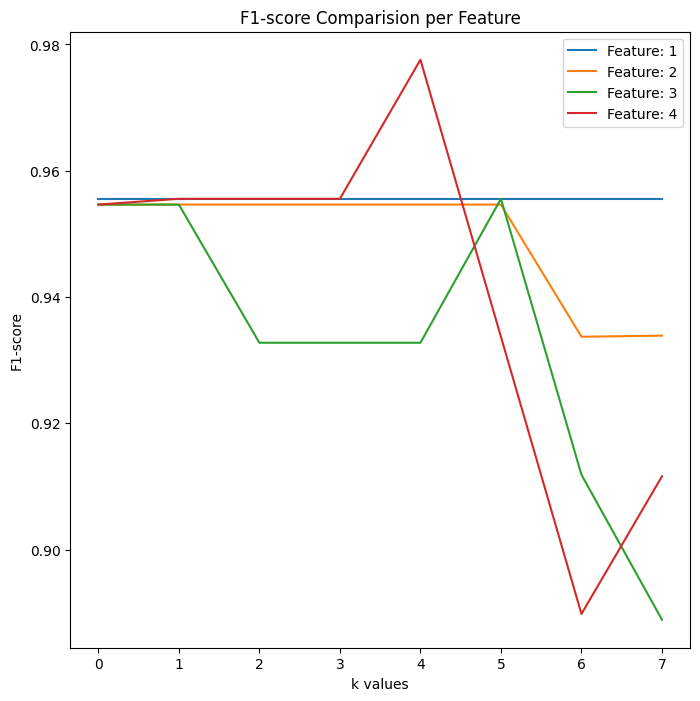

In [35]:
results(f1_score_1, feat)

2.2.4 Resultados modelo ideal à medida que se adicionam features

In [36]:
def ideal_model(str_print, number_repetitions):
    for i in range(number_repetitions):
        for d in str_print:
            print(d + ": " + str_print[d][i])
        print("-" * 30)

In [37]:
ideal_model(str_print_1, number_repetitions)

Number of Features: 1
Best k: 1
F1-score: 0.9777530589543938
------------------------------
Number of Features: 2
Best k: 1
F1-score: 1.0
------------------------------
Number of Features: 3
Best k: 11
F1-score: 1.0
------------------------------
Number of Features: 4
Best k: 9
F1-score: 1.0
------------------------------


##### 2.4 Classe iris-versicolor e classe iris-viriginica

In [38]:
def fisherscore(x, y):
    return fisher_score.fisher_score(x, y)

In [39]:
iris_dataframe = pd.DataFrame(d, columns=iris["feature_names"])
iris_dataframe["target"] = iris["target"]
setosa = iris_dataframe[iris_dataframe["target"] == 0]
vesicolor = iris_dataframe[iris_dataframe["target"] == 1].sample(30)
virginica = iris_dataframe[iris_dataframe["target"] == 2].sample(10)
new_iris = pd.concat([setosa, vesicolor, virginica], axis=0)
new_iris_grouped = new_iris.groupby("target").count()
display(new_iris)
display(new_iris_grouped)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
123,6.3,2.7,4.9,1.8,2
104,6.5,3.0,5.8,2.2,2
102,7.1,3.0,5.9,2.1,2
134,6.1,2.6,5.6,1.4,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,30,30,30,30
2,10,10,10,10


------------------ Class Imbalance ------------------


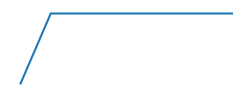

Number of Features: 1
Best k: 3
F1-score: 0.6962962962962962


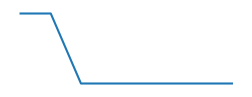

Number of Features: 2
Best k: 1
F1-score: 0.8931216931216931


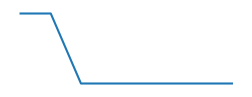

Number of Features: 3
Best k: 1
F1-score: 1.0


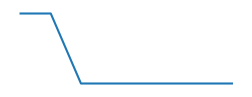

Number of Features: 4
Best k: 1
F1-score: 1.0


In [40]:
print("------------------ Class Imbalance ------------------") 


new_iris_data = np.array(new_iris.drop("target", axis=1))
new_iris_target = np.array(new_iris["target"])

feature_fisher = fisherscore(new_iris_data, new_iris_target)

f1_score_elbow_2, f1_score_2, str_print_2 = ranking_features(new_iris_data, new_iris_target, feature_fisher, number_repetitions, True)


2.4.2 Gráfivo do Cotovelo

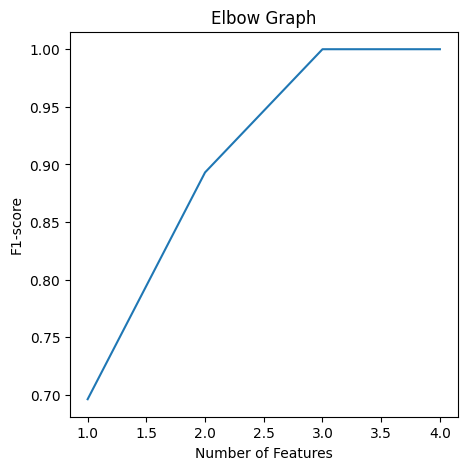

In [41]:
plot_elbow(f1_score_elbow_2)

2.4.3 Resultados Alcançados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.472503,0.589008,0.589008,0.589008,0.589008,0.589008,0.589008,0.589008
Nº of features: 2,0.749892,0.749892,0.706073,0.706073,0.706073,0.706073,0.706073,0.706073
Nº of features: 3,0.815937,0.815937,0.742351,0.742351,0.742351,0.742351,0.742351,0.742351
Nº of features: 4,0.815937,0.815937,0.742351,0.742351,0.742351,0.742351,0.742351,0.742351


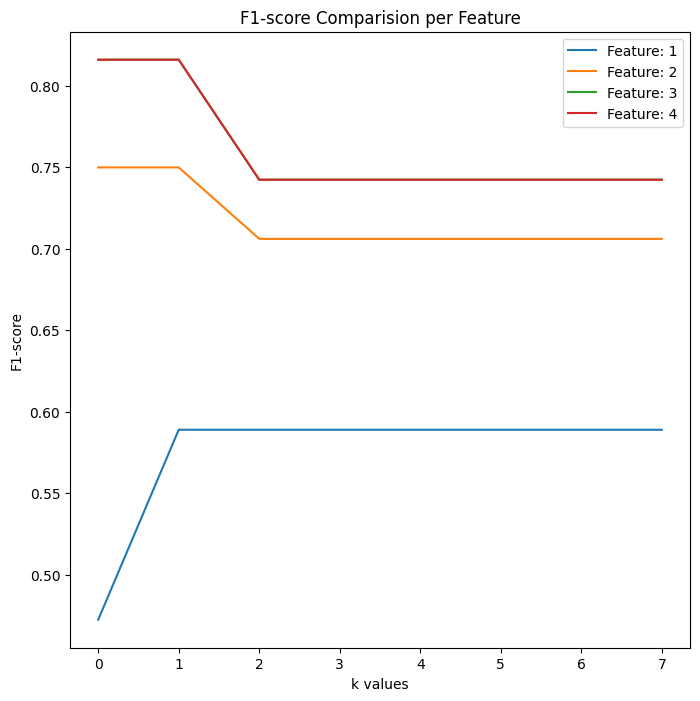

In [42]:
results(f1_score_2, feature_fisher)

2.4.4 Resultados modelo ideal à medida que se adicionam features

In [43]:
ideal_model(str_print_2, number_repetitions)

Number of Features: 1
Best k: 3
F1-score: 0.6962962962962962
------------------------------
Number of Features: 2
Best k: 1
F1-score: 0.8931216931216931
------------------------------
Number of Features: 3
Best k: 1
F1-score: 1.0
------------------------------
Number of Features: 4
Best k: 1
F1-score: 1.0
------------------------------


#### 3. Aplicação do ponto 2 no nosso dataset

In [44]:
emotions_name = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

In [45]:
def create_dataframe():
    landmarks = 68
    files = os.listdir("dataset/")

    d = {}

    actor_conj = {}
    df_final = None
    for file in files:
        d = {}
        divide = file.split("-")
        emotion = divide[2]
        actor = divide[-1].split(".")[0]
        f = pd.read_csv("dataset/" + file)
        df = pd.DataFrame(f)
        d["actor"] = actor
        d["emotion"] = emotions_name[int(emotion) - 1]
        if actor not in actor_conj:
            choice = random.choice(["Treino", "Teste"])
            d["conjunto"] = choice
            actor_conj[actor] = choice
        else:
            d["conjunto"] = actor_conj[actor]
        
        for i in range(landmarks):
            x_land = "x_" + str(i)
            y_land = "y_" + str(i)
            d[x_land] = df[x_land].mean()
            d[y_land] = df[y_land].mean()

        if df_final is None:
            df_final = pd.DataFrame([d])
        else:
            df_final = pd.concat([df_final, pd.DataFrame([d])], ignore_index=True)

    return df_final


In [46]:
if os.path.exists("dataframe.pkl"):
    with open("dataframe.pkl", 'rb') as arq:
        df = pkl.load(arq)
else:
    df = create_dataframe()
    with open("dataframe.pkl", 'wb') as arq:
        pkl.dump(df, arq)

# is_in = []
# for i in range(len(df)):
#     if df["conjunto"][i] == "Treino" and df["actor"][i] not in is_in:
#         print(df["actor"][i])
#         is_in.append(df["actor"][i])
#11 atores em treino: 4, 7, 8, 10, 11, 12, 13, 19, 21, 22, 24        
display(df)

,actor,emotion,conjunto,x_0,y_0,x_1,y_1,x_2,y_2,x_3,...,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67
0,01,Neutral,Teste,479.256122,295.571429,479.818367,339.416327,484.219388,382.962245,490.951020,...,641.476531,453.195918,680.666327,454.706122,640.481633,458.360204,621.351020,460.224490,604.741837,458.416327
1,02,Neutral,Teste,462.933028,350.588073,467.066972,395.631193,475.288991,439.553211,485.684404,...,657.673394,498.031193,687.928440,501.000917,657.756881,506.601835,641.267890,508.551376,625.501835,507.316514
2,03,Neutral,Teste,487.913592,312.003883,487.692233,358.868932,491.813592,405.903883,499.776699,...,670.507767,497.120388,702.852427,502.320388,669.697087,505.648544,650.689320,506.713592,633.344660,503.723301
3,04,Neutral,Treino,495.651515,286.596970,494.503030,335.847475,497.510101,385.597980,503.123232,...,646.060606,453.887879,680.781818,460.260606,644.634343,462.722222,626.583838,463.035354,609.781818,460.559596
4,05,Neutral,Teste,482.202778,313.806481,484.869444,363.087963,492.240741,412.183333,502.454630,...,670.633333,487.485185,711.686111,492.372222,670.240741,495.675926,650.576852,497.664815,632.616667,495.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,20,Fearful,Teste,468.634400,342.590400,473.088000,387.616000,481.584000,432.160000,494.246400,...,678.788000,433.092800,710.660000,450.820800,679.846400,452.934400,663.311200,453.931200,646.500000,454.379200
2448,21,Fearful,Treino,481.906349,357.706349,483.900000,402.824603,491.358730,447.606349,502.947619,...,649.261111,513.829365,678.761905,520.857937,649.740476,532.374603,631.438889,534.834921,614.977778,532.002381
2449,22,Fearful,Treino,455.967857,318.916429,454.407143,363.930000,458.758571,409.502857,466.404286,...,617.747857,452.348571,656.728571,467.563571,618.566429,470.042857,600.747857,471.447143,584.703571,470.595714
2450,23,Fearful,Teste,529.136170,303.490071,526.504255,352.943972,530.534043,404.617021,538.592908,...,690.756738,456.289362,733.464539,467.803546,689.637589,468.693617,670.685106,469.959574,654.620567,468.537589


In [47]:
expressions_data = df.drop(["emotion", "actor", "conjunto"], axis=1).values
expressions_target = df["emotion"].values
expressions_labels = np.array(df["emotion"].unique())

df_train = df[df["conjunto"] == "Treino"]
expressions_data_train = df_train.drop(["emotion", "actor", "conjunto"], axis=1).values
expressions_target_train = df_train["emotion"].values
display(df_train)

df_test = df[df["conjunto"] == "Teste"]
expressions_data_test = df_test.drop(["emotion", "actor", "conjunto"], axis=1).values
expressions_target_test = df_test["emotion"].values
display(df_test)


,actor,emotion,conjunto,x_0,y_0,x_1,y_1,x_2,y_2,x_3,...,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67
3,04,Neutral,Treino,495.651515,286.596970,494.503030,335.847475,497.510101,385.597980,503.123232,...,646.060606,453.887879,680.781818,460.260606,644.634343,462.722222,626.583838,463.035354,609.781818,460.559596
6,07,Neutral,Treino,467.629915,299.741026,470.894017,347.656410,478.993162,395.900000,489.814530,...,662.496581,470.436752,699.709402,473.029060,662.202564,479.444444,641.235043,482.188889,622.358974,480.008547
7,08,Neutral,Treino,481.935238,313.509524,483.667619,359.160952,489.477143,404.091429,498.034286,...,657.496190,465.410476,690.290476,469.722857,656.873333,472.837143,639.048571,474.358095,621.882857,473.081905
9,10,Neutral,Treino,469.041509,334.083962,468.851887,380.183962,473.449057,426.988679,482.310377,...,662.650943,494.106604,695.767925,500.920755,661.704717,503.380189,645.706604,504.153774,629.870755,502.730189
10,11,Neutral,Treino,495.577660,296.415957,497.472340,344.462766,502.698936,393.092553,508.587234,...,695.692553,452.150000,735.029787,461.948936,695.265957,457.944681,675.227660,459.141489,656.998936,457.864894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,13,Fearful,Treino,478.979528,306.348031,481.065354,355.050394,488.730709,403.907874,499.133858,...,647.111024,454.532283,680.899213,465.729134,649.253543,480.090551,631.248031,482.525984,615.405512,480.474803
2446,19,Fearful,Treino,458.125758,330.992424,459.665909,379.409091,463.391667,427.836364,466.990909,...,659.330303,517.646212,698.577273,515.194697,658.640152,531.485606,633.578030,534.171970,611.243182,530.583333
2448,21,Fearful,Treino,481.906349,357.706349,483.900000,402.824603,491.358730,447.606349,502.947619,...,649.261111,513.829365,678.761905,520.857937,649.740476,532.374603,631.438889,534.834921,614.977778,532.002381
2449,22,Fearful,Treino,455.967857,318.916429,454.407143,363.930000,458.758571,409.502857,466.404286,...,617.747857,452.348571,656.728571,467.563571,618.566429,470.042857,600.747857,471.447143,584.703571,470.595714


,actor,emotion,conjunto,x_0,y_0,x_1,y_1,x_2,y_2,x_3,...,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67
0,01,Neutral,Teste,479.256122,295.571429,479.818367,339.416327,484.219388,382.962245,490.951020,...,641.476531,453.195918,680.666327,454.706122,640.481633,458.360204,621.351020,460.224490,604.741837,458.416327
1,02,Neutral,Teste,462.933028,350.588073,467.066972,395.631193,475.288991,439.553211,485.684404,...,657.673394,498.031193,687.928440,501.000917,657.756881,506.601835,641.267890,508.551376,625.501835,507.316514
2,03,Neutral,Teste,487.913592,312.003883,487.692233,358.868932,491.813592,405.903883,499.776699,...,670.507767,497.120388,702.852427,502.320388,669.697087,505.648544,650.689320,506.713592,633.344660,503.723301
4,05,Neutral,Teste,482.202778,313.806481,484.869444,363.087963,492.240741,412.183333,502.454630,...,670.633333,487.485185,711.686111,492.372222,670.240741,495.675926,650.576852,497.664815,632.616667,495.675000
5,06,Neutral,Teste,473.146465,325.002020,475.491919,371.481818,482.691919,418.451515,491.671717,...,647.298990,462.676768,680.749495,472.811111,647.820202,480.742424,628.681818,482.946465,610.939394,482.029293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,15,Fearful,Teste,461.379167,308.042500,464.677500,355.182500,471.783333,401.745000,480.800833,...,643.979167,452.055833,678.538333,464.980000,644.360833,473.710833,624.601667,476.030833,606.400000,474.910833
2444,16,Fearful,Teste,465.458088,339.889706,463.758088,383.325735,467.197059,427.194853,477.038971,...,667.533088,484.094853,698.221324,495.125000,666.441176,494.724265,649.589706,494.624265,633.666176,492.256618
2445,17,Fearful,Teste,449.131061,393.964394,453.999242,450.983333,462.374242,506.818939,472.914394,...,666.945455,592.493182,706.746970,596.497727,667.084091,605.157576,643.779545,608.190152,622.803030,605.786364
2447,20,Fearful,Teste,468.634400,342.590400,473.088000,387.616000,481.584000,432.160000,494.246400,...,678.788000,433.092800,710.660000,450.820800,679.846400,452.934400,663.311200,453.931200,646.500000,454.379200


3.1.1. Train-only

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


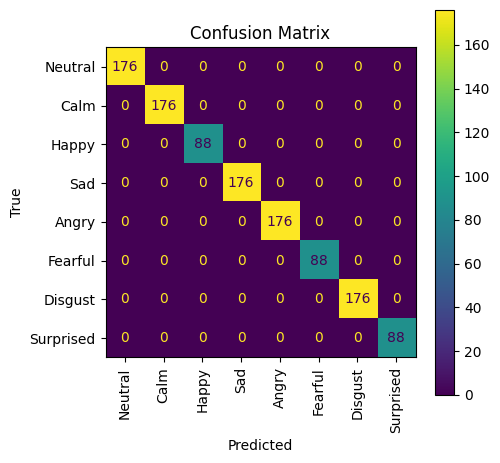

In [48]:
print("------------------ Train-Only ------------------")
to_2_1_1(expressions_data_train, expressions_target_train, expressions_labels, 1)

3.1.1. TT 70-30

------------------ Train-Test ------------------


,Metrics
Recall,0.288226
Precision,0.283263
F1-score,0.284681


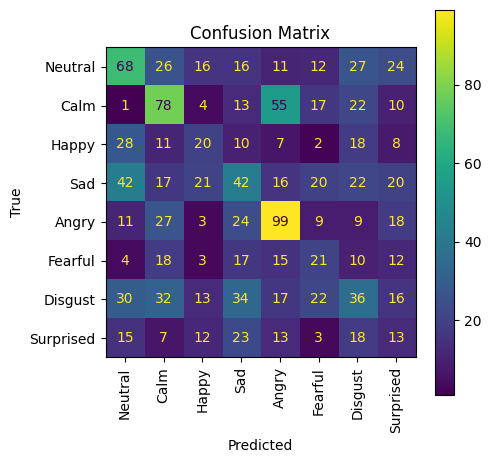

In [49]:
print("------------------ Train-Test ------------------")
def tt_3_1_1(x_train, y_train, x_test, y_test, labels, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    y_true = y_test
    metrics(y_true, y_pred, labels)
tt_3_1_1(expressions_data_train, expressions_target_train, expressions_data_test, expressions_target_test, expressions_labels, 1)

3.1.1. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,0.365217
Precision,0.439846
F1-score,0.392853


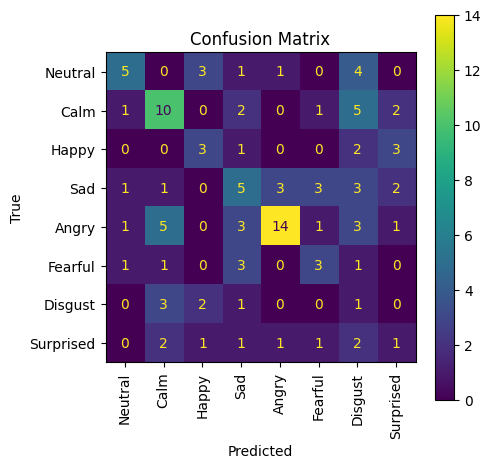

-> Iteração 1



,Metrics
Recall,0.269565
Precision,0.296026
F1-score,0.270699


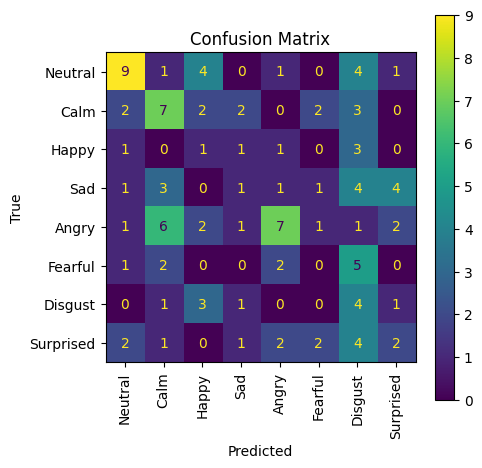

-> Iteração 2



,Metrics
Recall,0.304348
Precision,0.316865
F1-score,0.308378


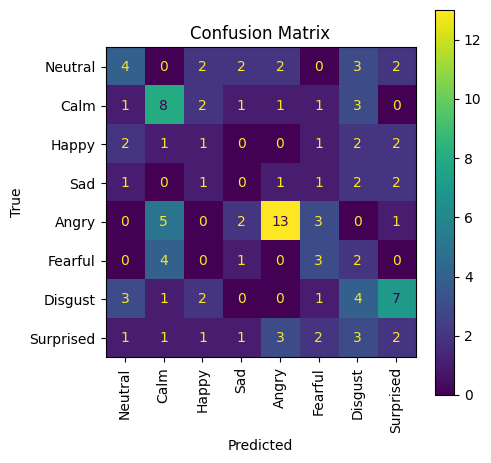

-> Iteração 3



,Metrics
Recall,0.252174
Precision,0.273822
F1-score,0.260839


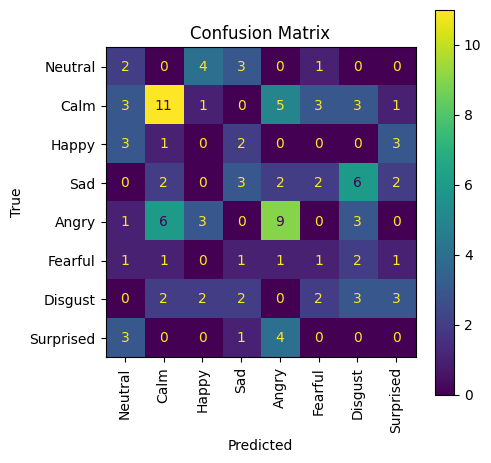

-> Iteração 4



,Metrics
Recall,0.289474
Precision,0.277195
F1-score,0.276491


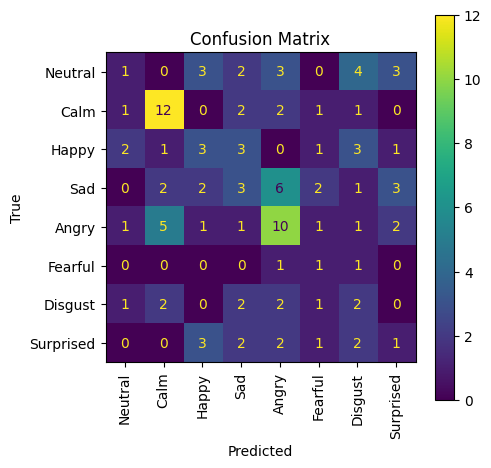

-> Iteração 5



,Metrics
Recall,0.263158
Precision,0.262285
F1-score,0.256567


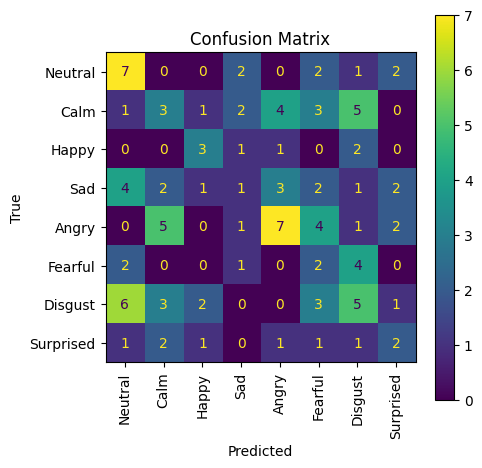

-> Iteração 6



,Metrics
Recall,0.254386
Precision,0.264804
F1-score,0.251037


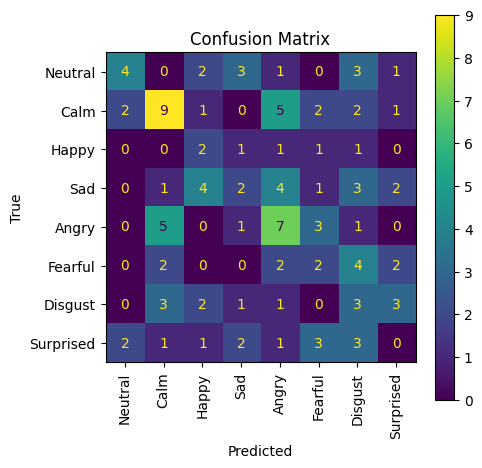

-> Iteração 7



,Metrics
Recall,0.280702
Precision,0.318364
F1-score,0.286430


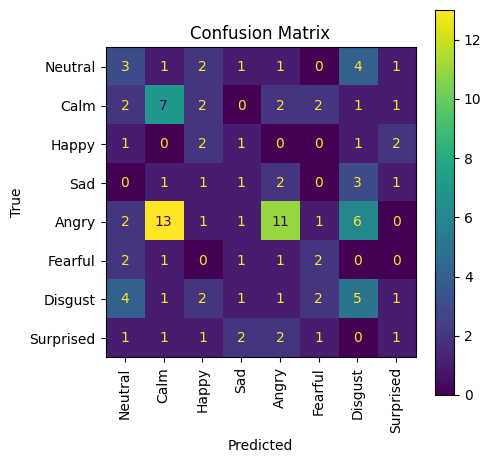

-> Iteração 8



,Metrics
Recall,0.271930
Precision,0.293776
F1-score,0.267981


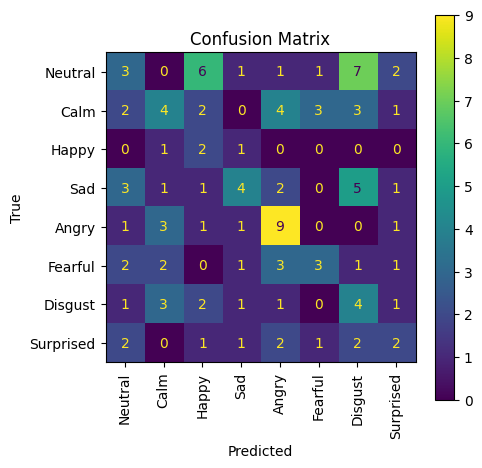

-> Iteração 9



,Metrics
Recall,0.263158
Precision,0.265580
F1-score,0.259756


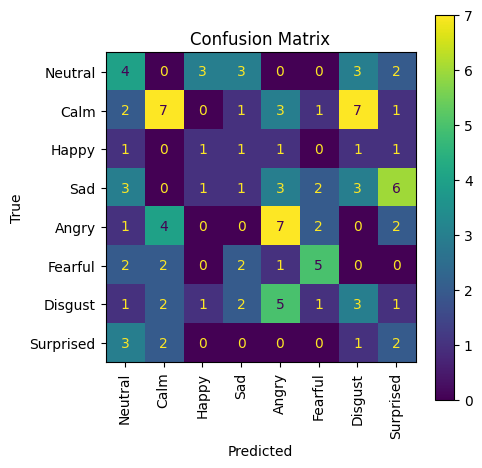

In [50]:
print("------------------ Cross-Validation ------------------")

def cv_3_1_1(x_train, y_train, x_test, y_test, n_splits, labels, k):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    count = 0
    for train_index, test_index in kfold.split(x_train):
        print("-> Iteração " + str(count) + "\n")
        
        x_train_k, x_test_k = x_train[train_index], x_test[test_index]
        y_train_k, y_test_k = y_train[train_index], y_test[test_index]

        neigh = k_nearest_neighbours(x_train_k, y_train_k, k) 
        y_pred = neigh.predict(x_test_k)
        y_true = y_test_k
        metrics(y_pred, y_true, labels)
        count += 1

cv_3_1_1(expressions_data_train, expressions_target_train, expressions_data_test, expressions_target_test, 10, expressions_labels, 1)

3.1.2. Train-only

------------------ Train-Only ------------------


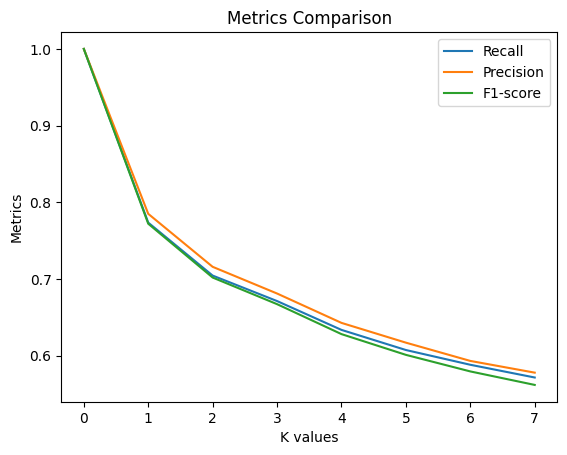

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


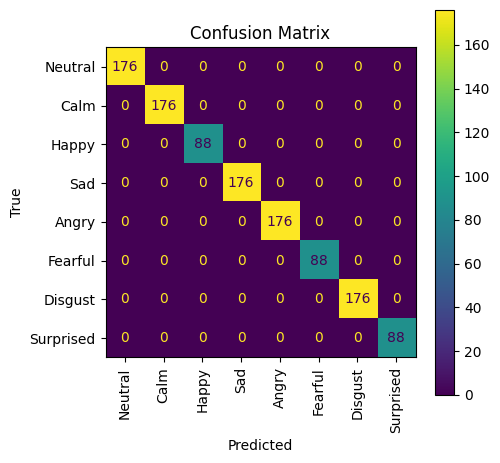

In [51]:
print("------------------ Train-Only ------------------")
to_2_1_2(expressions_data_train, expressions_target_train, expressions_labels, True)

3.1.2. TVT 40-30-30

------------------ Train-Validation-Test ------------------


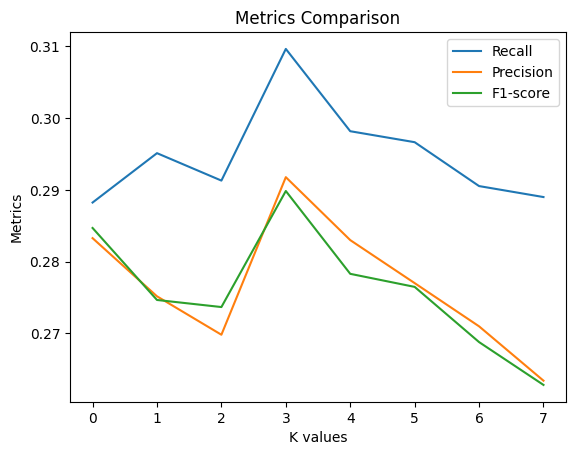

Best k: 7


,Metrics
Recall,0.701070
Precision,0.704791
F1-score,0.694833


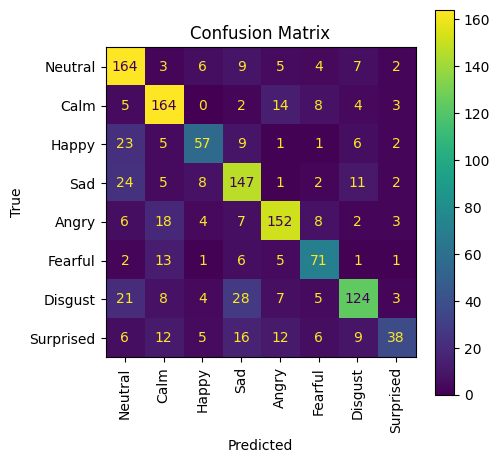

In [69]:
print("------------------ Train-Validation-Test ------------------")
def tvt_d_metrics_3(train_x, train_y, validation_x, validation_y, array_k):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        neigh = k_nearest_neighbours(train_x, train_y, k)
        y_pred = neigh.predict(validation_x)
        y_true = validation_y
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

def tvt_3_1_2(train_x, train_y, test_x, test_y, labels, plot):
    d_metrics = tvt_d_metrics_3(train_x, train_y, test_x, test_y, array_k)
    
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
    new_t0 = np.concatenate((train_x, test_x), axis=0)
    new_t1 = np.concatenate((train_y, test_y), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    y_pred = neigh.predict(test_x)
    y_true = test_y
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

tvt_3_1_2(expressions_data_train, expressions_target_train, expressions_data_test, expressions_target_test, expressions_labels, True)

3.1.2. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0

Best k: 5


,Metrics
Recall,0.291284
Precision,0.269804
F1-score,0.273662


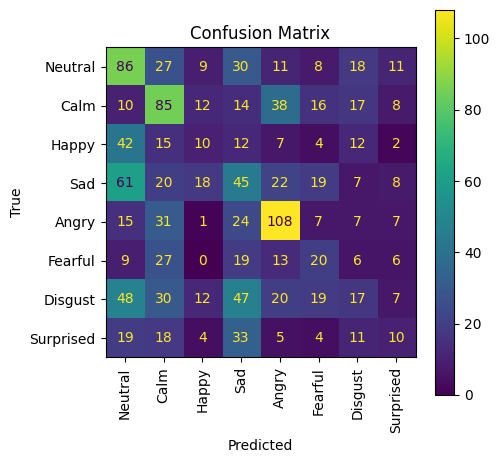

-> Iteração 1

Best k: 7


,Metrics
Recall,0.309633
Precision,0.291761
F1-score,0.289834


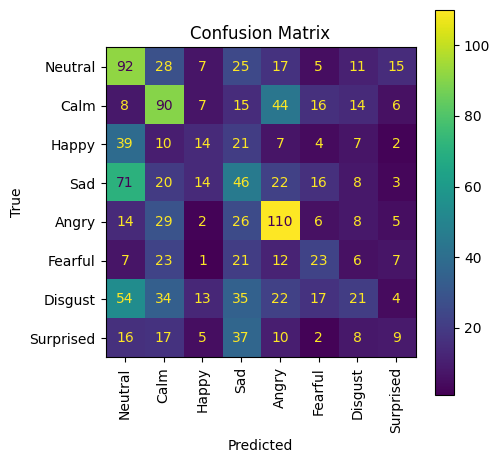

-> Iteração 2

Best k: 1


,Metrics
Recall,0.288226
Precision,0.283263
F1-score,0.284681


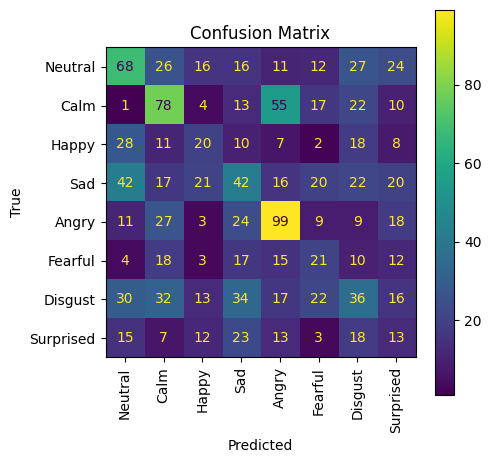

-> Iteração 3

Best k: 7


,Metrics
Recall,0.309633
Precision,0.291761
F1-score,0.289834


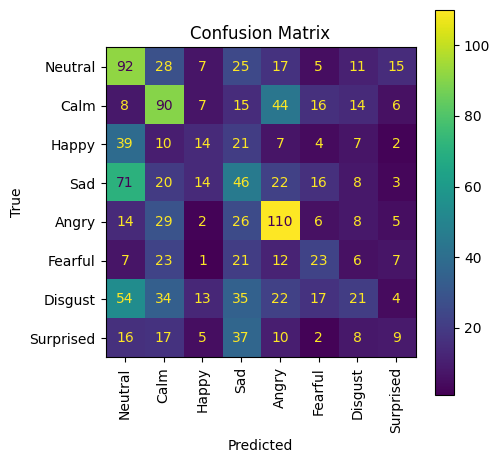

-> Iteração 4

Best k: 11


,Metrics
Recall,0.296636
Precision,0.276999
F1-score,0.276472


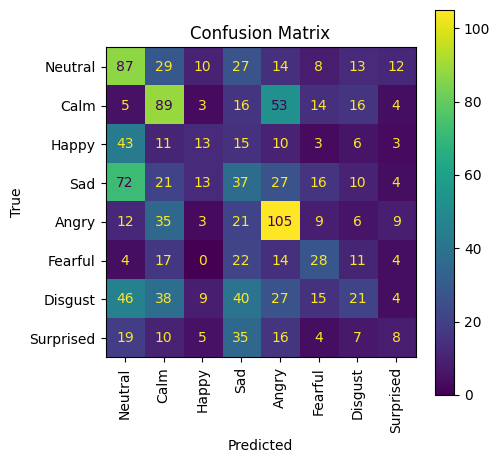

-> Iteração 5

Best k: 11


,Metrics
Recall,0.296636
Precision,0.276999
F1-score,0.276472


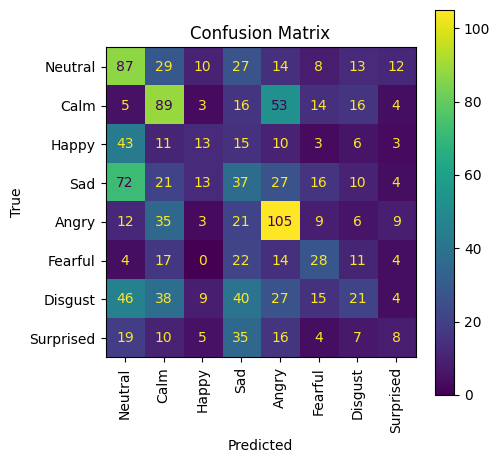

-> Iteração 6

Best k: 13


,Metrics
Recall,0.290520
Precision,0.270976
F1-score,0.268780


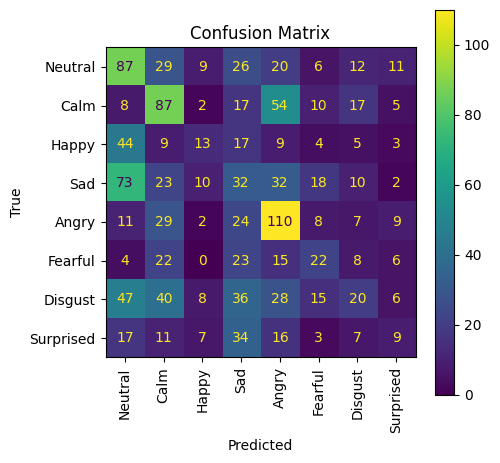

-> Iteração 7

Best k: 15


,Metrics
Recall,0.288991
Precision,0.263404
F1-score,0.262811


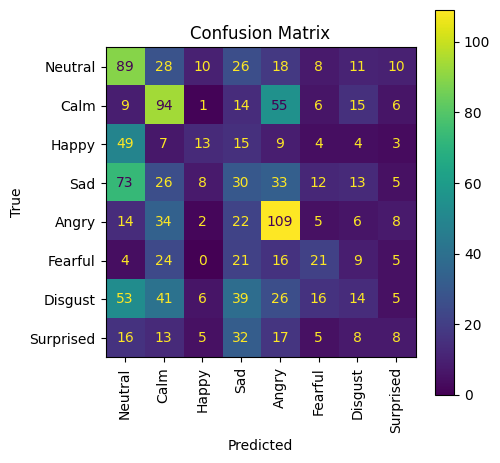

-> Iteração 8

Best k: 7


,Metrics
Recall,0.309633
Precision,0.291761
F1-score,0.289834


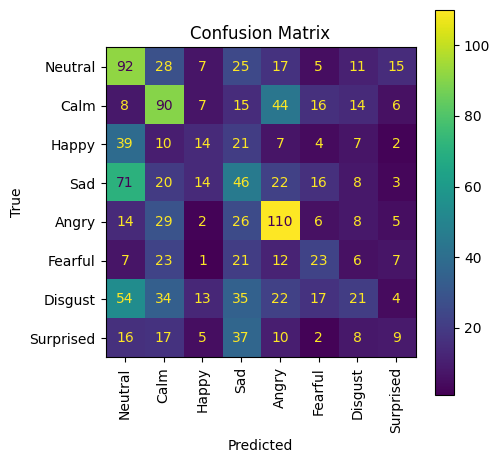

-> Iteração 9

Best k: 3


,Metrics
Recall,0.295107
Precision,0.275159
F1-score,0.274649


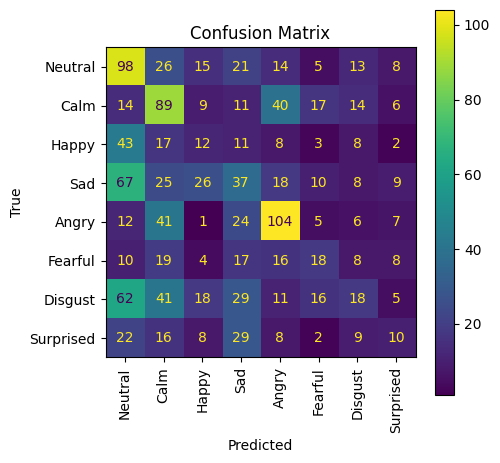

In [77]:
print("------------------ Cross-Validation ------------------")
def cv_3_1_2(x_train, y_train, x_test, y_test, n_splits, labels, plot):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    count = 0
    for train_index, test_index in kfold.split(x_train):
        print("-> Iteração " + str(count) + "\n")
        
        x_train_k, x_test_k = x_train[train_index], x_test[test_index]
        y_train_k, y_test_k = y_train[train_index], y_test[test_index]
        f1_score = []
        for k in array_k:
            neigh = k_nearest_neighbours(x_train_k, y_train_k, k) 
            y_pred = neigh.predict(x_test_k)
            y_true = y_test_k

            f1_score.append(metrics(y_pred, y_true, None)[3])
        count += 1

        best_k = array_k[np.argmax(f1_score)]
        neigh = k_nearest_neighbours(x_train, y_train, best_k)
        y_pred = neigh.predict(x_test)
        y_true = y_test
        if plot:
            print("Best k: " + str(best_k))
            metrics(y_true, y_pred, labels)
cv_3_1_2(expressions_data_train, expressions_target_train, expressions_data_test, expressions_target_test, 10, expressions_labels, True)

##### 3.2. ReliefF

------------------ Features Ranking ------------------


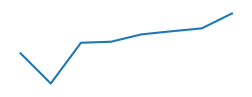

Number of Features: 1
Best k: 15
F1-score: 0.30386516756861953


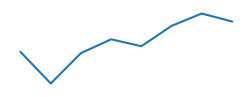

Number of Features: 2
Best k: 13
F1-score: 0.32485230948763616


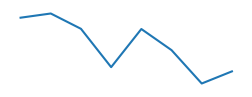

Number of Features: 3
Best k: 3
F1-score: 0.5470054851089715


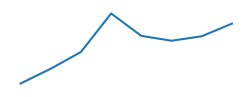

Number of Features: 4
Best k: 7
F1-score: 0.5090042436009534


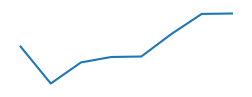

Number of Features: 5
Best k: 15
F1-score: 0.46921670859804726


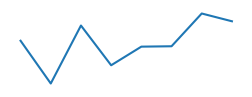

Number of Features: 6
Best k: 13
F1-score: 0.48851305020809443


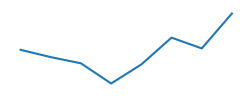

Number of Features: 7
Best k: 15
F1-score: 0.4649841367550212


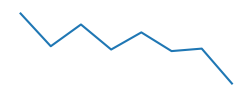

Number of Features: 8
Best k: 1
F1-score: 1.0


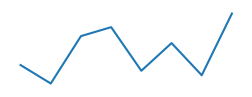

Number of Features: 9
Best k: 15
F1-score: 0.47043355868488557


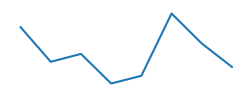

Number of Features: 10
Best k: 11
F1-score: 0.5501510534426154


In [97]:
print("------------------ Features Ranking ------------------")

def parameters_to_print_3(f1_aux, f, x_train_f, x_validation_f, x_test, y_test, y_train, string_features, i, plot):
    best_k = array_k[f1_aux.index(max(f1_aux))]
    string_features["Number of Features"].append(str(len(f)))
    string_features["Best k"].append(str(best_k))

    new_t0 = np.concatenate((x_train_f, x_validation_f), axis=0)
    new_t1 = np.concatenate((y_train, y_test), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    x_test = x_test[:, f]
    y_pred = neigh.predict(x_test)
    y_true = y_test
    cm, r, ps, fs = metrics(y_true, y_pred, None)
    string_features["F1-score"].append(str(fs))
    if plot:
        for p in string_features:
            print(p + ": " + string_features[p][i])
    return fs, string_features

def ranking_features_3(x_train, y_train, x_test, y_test, feat, n_repetitions, plot):
    f1 = []
    array_elbow = []
    string_features = {"Number of Features": [], "Best k": [], "F1-score": []}

    for i in range(n_repetitions):
        f1_aux = []
        f = feat[: (i + 1)]
        x_train_f = x_train[:, f]
        x_validation_f = x_test[:, f]
        for k in array_k:
            neigh = k_nearest_neighbours(x_train_f, y_train, k)
            
            y_pred = neigh.predict(x_validation_f)
            
            y_true = y_test
            cm, r, ps, fs = metrics(y_true, y_pred, None)
            f1_aux.append(fs)
        f1.append(f1_aux)
        if plot: 
            plot_features(f1_aux, 3, 1)
        fs, string_features = parameters_to_print_3(f1_aux, f, x_train_f, x_validation_f, x_test, y_test, y_train, string_features, i, plot)
        array_elbow.append(fs)
    
    return array_elbow, f1, string_features

feat = reliefF(expressions_data_train, expressions_target_train)
number_repetitions = 10
f1_score_elbow_3, f1_score_3, str_print_3 = ranking_features_3(expressions_data_train, expressions_target_train, expressions_data_test, expressions_target_test, feat, number_repetitions, True)

3.2.2 Elbow Graph

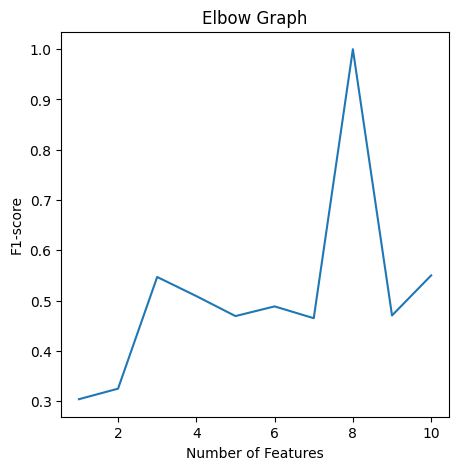

In [98]:
plot_elbow(f1_score_elbow_3)

3.2.3 Validação dos Resultados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.145426,0.132709,0.149882,0.150319,0.153411,0.154727,0.155948,0.162216
Nº of features: 2,0.191086,0.173964,0.190475,0.197977,0.194227,0.205266,0.212003,0.207672
Nº of features: 3,0.201655,0.203068,0.197911,0.184995,0.197840,0.190730,0.179491,0.183573
Nº of features: 4,0.211810,0.217177,0.223255,0.237220,0.229095,0.227335,0.228958,0.233537
Nº of features: 5,0.234718,0.216574,0.226930,0.229591,0.229843,0.240943,0.250756,0.250966
Nº of features: 6,0.238159,0.225840,0.242542,0.231094,0.236458,0.236571,0.246010,0.243770
Nº of features: 7,0.238747,0.236610,0.234793,0.228888,0.234470,0.242313,0.239159,0.249383
Nº of features: 8,0.250285,0.246463,0.249002,0.246078,0.248080,0.245895,0.246184,0.242111
Nº of features: 9,0.242429,0.239220,0.247459,0.249018,0.241434,0.246249,0.240657,0.251393
Nº of features: 10,0.266851,0.259812,0.261422,0.255405,0.256968,0.269629,0.263544,0.258773


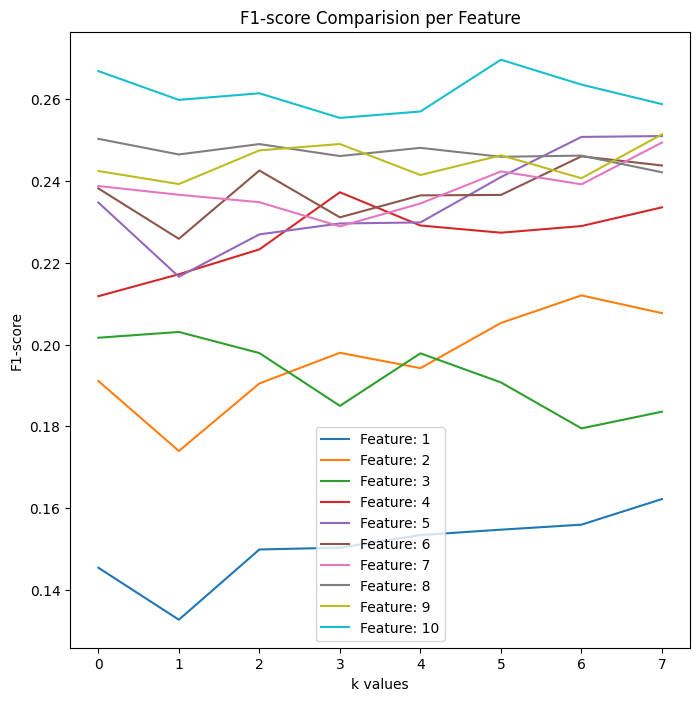

In [99]:
results(f1_score_3, feat)

3.2.4 Resultados dos Testes

In [100]:
ideal_model(str_print_3, number_repetitions)

Number of Features: 1
Best k: 15
F1-score: 0.30386516756861953
------------------------------
Number of Features: 2
Best k: 13
F1-score: 0.32485230948763616
------------------------------
Number of Features: 3
Best k: 3
F1-score: 0.5470054851089715
------------------------------
Number of Features: 4
Best k: 7
F1-score: 0.5090042436009534
------------------------------
Number of Features: 5
Best k: 15
F1-score: 0.46921670859804726
------------------------------
Number of Features: 6
Best k: 13
F1-score: 0.48851305020809443
------------------------------
Number of Features: 7
Best k: 15
F1-score: 0.4649841367550212
------------------------------
Number of Features: 8
Best k: 1
F1-score: 1.0
------------------------------
Number of Features: 9
Best k: 15
F1-score: 0.47043355868488557
------------------------------
Number of Features: 10
Best k: 11
F1-score: 0.5501510534426154
------------------------------


#### 4. Rede Neuronal Feedforward

In [84]:
def best_neuron(array_f1, array_neurons, labels, speed):
    best_f1 = np.argmax(array_f1)
    best_neuron = array_neurons[best_f1]

    print("Best neuron: " + str(best_neuron))

    if speed == "fixed":
        clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    elif speed == 'variable':
        clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    else:
        clf = MLPClassifier(activation='logistic', hidden_layer_sizes=best_neuron, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)
    
    x = np.concatenate((expressions_data_train, expressions_data_test))
    y = np.concatenate((expressions_target_train, expressions_target_test))

    clf.fit(x, y)
    
    y_pred = clf.predict(expressions_data_test)
    y_true = expressions_target_test

    metrics(y_true, y_pred, labels)

In [101]:
def multi_layer_percepton(labels, speed):    
    array_neurons = np.arange(5, 500, 5)

    neural_networks = []

    array_f1 = []

    for i in array_neurons:
        if speed == "fixed":
            clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        elif speed == 'variable':
            clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        else:
            clf = MLPClassifier(activation='logistic', hidden_layer_sizes=i, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)

        neural_networks.append(clf.fit(expressions_data_train, expressions_target_train))

        y_pred = clf.predict(expressions_data_test)

        y_true = expressions_target_test

        cm, r, ps, fs = metrics(y_true, y_pred, None)

        array_f1.append(fs)

    best_neuron(array_f1, array_neurons, labels, speed)


------------------ Fixed learning speed------------------
Best neuron: 50


,Metrics
Recall,0.152905
Precision,0.023380
F1-score,0.040558


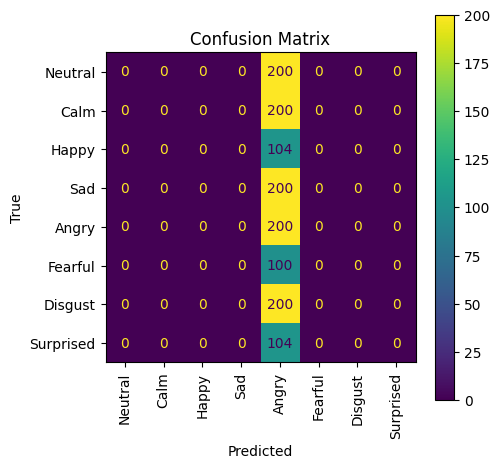

In [102]:
print("------------------ Fixed learning speed------------------")
multi_layer_percepton(expressions_labels, "fixed")

------------------ Variable learning speed------------------
Best neuron: 275


,Metrics
Recall,0.152905
Precision,0.023380
F1-score,0.040558


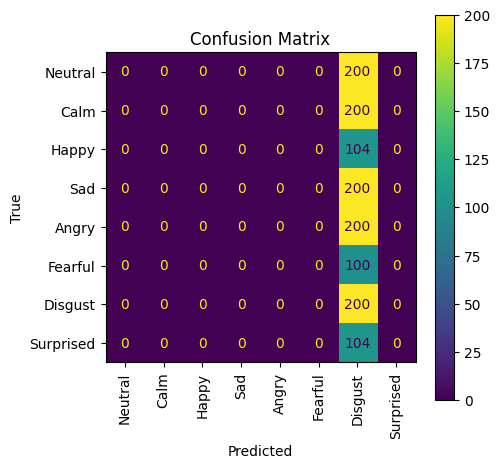

In [103]:
print("------------------ Variable learning speed------------------")
multi_layer_percepton(expressions_labels, "variable")

------------------ Momentum coeficient------------------
Best neuron: 60


,Metrics
Recall,0.152905
Precision,0.023380
F1-score,0.040558


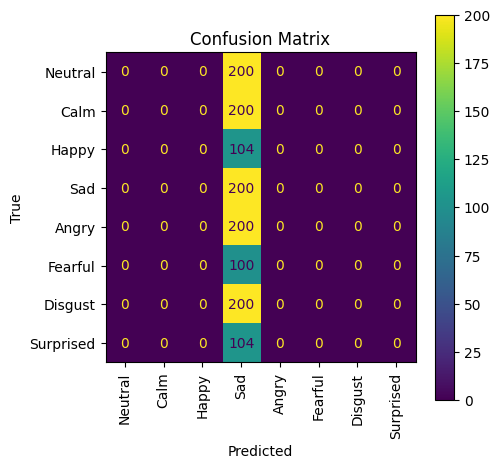

In [104]:
print("------------------ Momentum coeficient------------------")
multi_layer_percepton(expressions_labels, "momentum")

#### 5. A nossa Rede Neuronal

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Inicialização dos pesos
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

    def feedforward(self, x):
        # Camada oculta
        self.hidden_layer_input = np.dot(x, self.weights_input_hidden)
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        # Camada de saída
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backpropagation(self, x, y, learning_rate):
        # Cálculo do erro
        error = y - self.output_layer_output

        # Gradiente da camada de saída
        output_delta = error * sigmoid_derivative(self.output_layer_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)

        # Gradiente da camada oculta
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # Atualização dos pesos
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += x.T.dot(hidden_delta) * learning_rate

    def train(self, x_train, y_train, epochs, learning_rate):
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        print("x_train[0]:", x_train[0])
        print("y_train[0]:", y_train[0])
        print("Type of x_train:", type(x_train))
        print("Type of y_train:", type(y_train))
        print("Shape of x_train:", x_train.shape)
        print("Shape of y_train:", y_train.shape)

        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i].reshape(1, -1)
                y = y_train_encoded[i].reshape(1, -1)

                # Feedforward e retropropagação para cada exemplo de treinamento
                self.feedforward(x)
                self.backpropagation(x, y, learning_rate)

    def predict(self, x):
        return self.feedforward(x)

# Exemplo de uso:
def uso_(data, target, labels, speed):
    tv = multi_layer_percepton(data, target, labels, speed)

    X_train, y_train = tv["TRAIN"]
    X_test, y_test = tv["TEST"]
    # Suponha que você tenha dados de entrada X_train e saídas desejadas y_train
    # Certifique-se de normalizar/escalar seus dados antes de usar a rede neural
    # ...

    # Cria uma instância da sua rede neural personalizada
    input_size = X_train.shape[1]
    hidden_size = 4  # ajuste conforme necessário
    output_size = 1  # ajuste conforme necessário
    nn = CustomNeuralNetwork(input_size, hidden_size, output_size)

    # Treina a rede neural
    nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

    # Faz previsões
    predictions = nn.predict(X_test)
    print(predictions)

